# Simulation for Milky way stars

In [41]:
# consider this paquets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Functions
In the following cell, the functions used during the simulation are presented. For more details, refer to the ReadMe and the papers contained in it.


In [42]:
def xi_m(m):
  """
  Calculates Kroupa IMF (details are provided in README). An array of initial masses is created in order
  to define masks corresponding to the mass ranges of the Kroupa IMF. A matrix (out) is generated to store
  the values of the number of stars per unit mass (dN/dm). By applying each mask to the matrix, the Kroupa
  equation for that specific mass interval is assigned, considering a proportionality constant ki, that
  ensures smooth transitions at the boundaries.

  input
  m: list of stars initial masses

  output
  out: array with dN/dm values
    """

  # convert m into a Numpy array to realized vectorials operations
  m = np.asarray(m)

  # matrix with zeros to save dN/dm values
  out = np.zeros_like(m, dtype=float)

  mask1 = (m >= 0.08) & (m < 0.5)
  mask2 = (m >= 0.5) & (m < 1.0)
  mask3 = (m >= 1.0) & (m <= 100.0)
  out[mask1] = k[0] * m[mask1]**(-1.8)
  out[mask2] = k[1] * m[mask2]**(-2.7)
  out[mask3] = k[2] * m[mask3]**(-2.3)

  return out

def xi_norm(m):
  """
  Normalize dN/dm values by dividing its value at the minimum mass of the range, which corresponds to the
  maximum value of dN/dm.

  input
  m: list of stars initial masses in Msun

  output
  xi_norm: values of dN/dm normalized
  """
  xi_norm = xi_m(m) / xi_m(mass_range[0])
  return xi_norm


def time_in_ms(m):
  """
  Calculates the approximate time a star remains on the main sequence.

  input
  m: initial mass of the star in Msun

  output
  time in the MS lifetime in year
  """
  return 1e10 * m**(-2.5) # yr


def ifmr_wd(m):
  """
  Calculates the IFMR for white dwarfs according to Kalirai et al. (2008). This autor consider
  just one fit in that mass range.

  input:
  m: initial mass of the star Msun

  output:
  Final white dwarf mass in Msun
  """
  return (0.109 * m) + 0.394

def ifmr_ns(m):
  """
  Calculates the IFMR for neutron stars according to Raithel et al. (2018). For this fitting, the autor
  consider diferent branches depending on the mass range.

  input:
  m: initial mass of the star in M☉.

  output:
  Final neutron star mass in Msun
  Returns None if m is over 18.5 Msun
  """

  m = float(m)

  # Branch I
  if 9.0 <= m <= 13.0:
      x = m - 14.75
      return 2.24 + (0.508*x) + (0.125 * (x**2)) + (0.0110 * (x**3))

  # Branch II
  if 13.0 < m < 15.0:
      return 0.123 + (0.112 * m)

  # Branch III
  if 15.0 <= m < 17.8:
      return 0.996 + (0.0384 * m)

  # Branch IV
  if 17.8 < m < 18.5:
        return -0.020 + (m * 0.10)

  return None


def ifmr_bh(m, f_ej=0.9):
  """
  Calculates the IFMR for black holes according to Raithel et al. (2018). For this fitting, the autor
  consider diferent branches depending on the mass range.

  input:
  m: initial mass of the star in Msun
  f_ej: fraction of the envelope expelled during collapse (0 ≤ f_ej ≤ 1. By default we use f_ej = 0.9.

  output:
  Final black hole mass in Msun
  Returns None if M is outside the ranges 15–40 y 45–120 Msun.
  """
  m = float(m)

  # Branch I:
  if 15.0 <= m <= 40.0:
      # BH core
      m_core = -2.049 + (0.4140 * m)

      # BH all
      x = m - 25.97
      m_all = 15.52 - (0.3294 * x) - (0.02121 * x**2) + (0.003120 * x**3)
      return (f_ej * m_core) + (1.0 - f_ej) * m_all

  # Branch II:
  if 45.0 <= M <= 120.0:
      M_core = 5.697 + (7.8598e8 * (M ** -4.858))
      return M_core

  return None


# IFM
For this simulation we used Krouppa IMF. The exponent $\alpha$ depent on the mass range. More details are at the articles mentioned in README.md.

In [43]:
np.random.seed(42) # select a random seed

In [44]:
# Krouppa exponents and mass ranges
alpha = np.array([1.8, 2.7, 2.3])
mass_range = np.array([0.08, 0.5, 1.0, 100.0])

# Solution to borders discontinuity
k = np.zeros(len(alpha))
k[0] = 1.0  # define an arbitrary k_0
k[1] = k[0] * (mass_range[1]**( -alpha[0])) / (mass_range[1]**(-alpha[1])) # continuity at 0.5 Msun
k[2] = k[1] * (mass_range[2]**( -alpha[1])) / (mass_range[2]**(-alpha[2])) # continuity at 1 Msun

# Define a number of stars
# over 100 millions simulation explots
N = 20000000

# Krouppa IMF plot
m_plot = np.linspace(mass_range[0], mass_range[-1], N)
xi_plot = xi_norm(m_plot)

# Used this to check if the normalization is goood
# the maximal value of dN/dm should be 1
np.max(xi_plot)

np.float64(1.0)

# Monte Carlo Method
We utilized this method to generated uniform random probabilities (or dN/dm) for each uniform random value of initial mass. The probability values that are under the dN/dm values defined by Krouppa, are considered belonging Milky Way stars.

In [45]:
u_random = np.random.uniform(0, 1, N)       # random probabilities
m_random = np.random.uniform(0.08, 100, N)  # random initial masses

mask_krouppa = u_random < xi_norm(m_random)
m_krouppa = m_random[mask_krouppa] # inital masses following Krouppa
u_krouppa = u_random[mask_krouppa] # probabilites for thoses masses

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-805259109.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('M$_{initial}$ [M$_\odot$]')


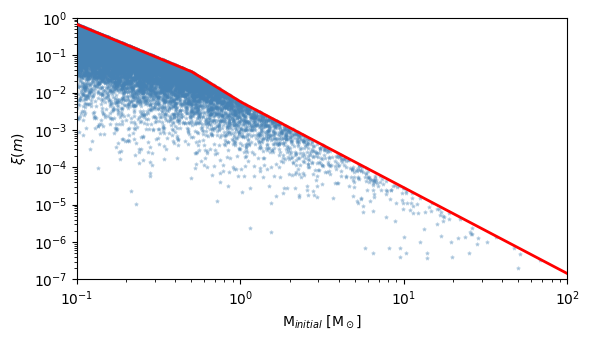

The number of stars that follows Krouppa is: 17625


In [72]:
# Plot of m_krouppa vs u_krouppa in logaritmic scale
plt.figure(figsize=(6,3.5))
plt.plot(m_plot, xi_plot, lw=2, color='red', zorder=5)
plt.scatter(m_krouppa, u_krouppa, s=5, alpha=0.3, color='steelblue', marker='*', zorder=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M$_{initial}$ [M$_\odot$]')
plt.ylabel('$ξ(m)$')
plt.xlim(1e-1, 1e2)
plt.ylim(1e-7, 1)
plt.tight_layout()
plt.show()

print('The number of stars that follows Krouppa is:', len(m_krouppa))

# SFR

We simulated the Milky Way with constant star formation during galaxie time ($10^{10}$ year for purpose of this simultation). Then, for each star at the Milky Way we define a time of born generating a uniform random time of birth between 0 and $10^{10}$ year.

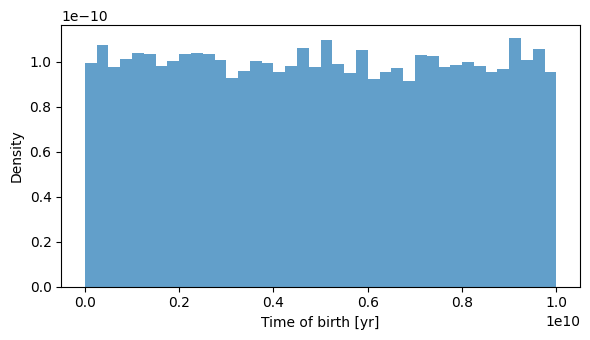

In [47]:
mw_age = 1e10 # Milky Way age [yr]
t_birth = np.random.uniform(0.0, mw_age, len(m_krouppa)) # time of born
t_today = mw_age - t_birth # actual age of the star

# Plot of SFR during Milky Way timelife
plt.figure(figsize=(6,3.5))
plt.hist(t_birth, bins=40, density=True, alpha=0.7)
plt.xlabel("Time of birth [yr]")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Main sequence lifetime


We calculate the main sequence lifetime of our stars. As the path the stars follow from MS to finally be a remnant is neglibible in comparisson to MS and remnant life, this is not taking into account in this simulation. To separated thoses stars that still at the MS form thoses tha are remnant, we used a simple classification method. If MS time is bigger than the current age of the star, it will be a stellar remnant, and if not, the star still at the MS.

In [48]:
t_ms = time_in_ms(m_krouppa)  # time at the MS
star_ms = (t_today <= t_ms)   # stars at the MS
remnant = (t_today > t_ms)    # stellar remnants

N_ms  = int(star_ms.sum()) # number of stars on the MS
N_rem = int(remnant.sum()) # number of remnants

print("Stars in the MS:", N_ms)
print("Remnants:", N_rem)

Stars in the MS: 17045
Remnants: 580


# What kind of remnants are they?
The kind of remnat is given by the IFMR of each type of remnant. More details about fitting this stars, mass ranges and branches can be found at the articles mentioned in README.md.

In [49]:
# Information about star type, final mass and ages
star_type = np.full(len(m_krouppa), 'no_star', dtype=object)
m_final  = np.full(len(m_krouppa), np.nan, dtype=float)
ages = np.full(len(m_krouppa), np.nan, dtype=float)

idx_rem = np.where(remnant)[0] # remnant star index
idx_ms = np.where(star_ms)[0] # MS star index

# Add the MS stars information
star_type[idx_ms] = 'MS'
m_final[idx_ms] = m_krouppa[idx_ms]
ages[idx_ms] = t_today[idx_ms]

# Add the remnants information
p_BH_I = 0.574 # probability of being a BH

for i in idx_rem:
    M_init = m_krouppa[i]

    # WD
    if M_init < 9.0:
        star_type[i] = 'WD'
        m_final[i] = ifmr_wd(M_init)
        ages[i] = t_today[i]

    # NS
    elif 9.0 <= M_init < 15.0:
        star_type[i] = 'NS'
        m_final[i] = ifmr_ns(M_init)
        ages[i] = t_today[i]

    # Uncertainty between NS and BH
    elif 15.0 <= M_init < 18.5:
        u = np.random.rand()   # random probability [0,1]

        if u < p_BH_I:
            star_type[i] = 'BH'
            m_final[i] = ifmr_bh(M_init, f_ej=0.9)
            ages[i] = t_today[i]

        else:
            star_type[i] = 'NS'
            m_final[i] = ifmr_ns(M_init)
            ages[i] = t_today[i]

    # More than 18.5 Msun is BH
    else:
        star_type[i] = 'BH'
        m_final[i] = ifmr_bh(M_init, f_ej=0.9)
        ages[i] = t_today[i]

num_MS = np.sum(star_type == 'MS')
num_WD = np.sum(star_type == 'WD')
num_NS = np.sum(star_type == 'NS')
num_BH = np.sum(star_type == 'BH')

print("Amount of remnants:")
print("  MS:", num_MS)
print("  WD:", num_WD)
print("  NS:", num_NS)
print("  BH:", num_BH)


Amount of remnants:
  MS: 17045
  WD: 519
  NS: 35
  BH: 26


In [50]:
# Extract the information of M_init, M_final, age
# for each type of star
mask_WD  = (star_type == 'WD')
mask_NS  = (star_type == 'NS')
mask_BH  = (star_type == 'BH')
mask_MS  = (star_type == 'MS')

m_init_WD, m_final_WD, age_WD = m_krouppa[mask_WD], m_final[mask_WD], ages[mask_WD]
m_init_NS, m_final_NS, age_NS = m_krouppa[mask_NS], m_final[mask_NS], ages[mask_NS]
m_init_BH, m_final_BH, age_BH = m_krouppa[mask_BH], m_final[mask_BH], ages[mask_BH]
m_init_MS, m_final_MS, age_MS = m_krouppa[mask_MS], m_final[mask_MS], ages[mask_MS]


<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:40: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:40: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3985742322.py:39: SyntaxWarning: invalid escape sequence '\o'
  ax_main.set_xlabel("M$_{inicial}$ [M$_\odot$]")
/tmp/ipython-input-3985742322.py:40: SyntaxWarning: invalid escape sequence '\o'
  ax_main.set_ylabel("M$_{final}$ [M$_\odot$]")


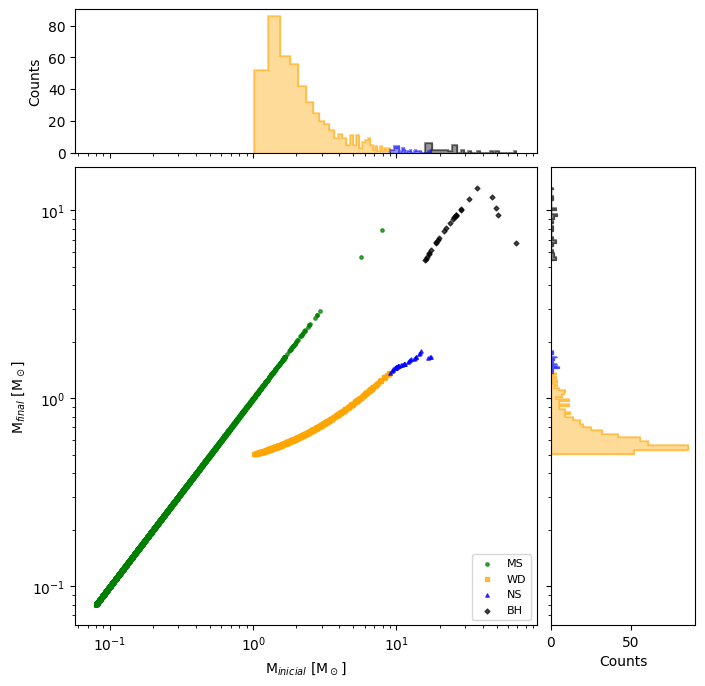

In [71]:
# Plot of M_init vs M_final
# Histograms of M_init and M_final density

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.1)

ax_main = fig.add_subplot(gs[1:4, 0:3]) #main panel
ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main) #top panel
ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main) # right panel

types = ['MS', 'WD', 'NS', 'BH']
m_init_list = [m_init_MS, m_init_WD, m_init_NS, m_init_BH]
m_final_list = [m_final_MS, m_final_WD, m_final_NS, m_final_BH]
colors = ['green', 'orange', 'blue', 'black']
markers = ['o', 's', '^', 'D']

for t, mi, mf, c, m in zip(types, m_init_list, m_final_list, colors, markers):

  ax_main.scatter(mi, mf, label=t, s=6, alpha=0.7, color=c, marker=m)

  if t != 'MS':
    # we do not plot MS stars at histogram

    # initial mass (top panel)
    ax_top.hist(mi, bins=30, histtype='stepfilled', color=c, edgecolor=c, alpha=0.4, zorder=1)
    ax_top.hist(mi, bins=30, histtype='step', color=c, linewidth=1.5, alpha=0.4, zorder=2)

    # final mass (right panel)
    ax_right.hist(mf, bins=30, orientation='horizontal', histtype='stepfilled', color=c, edgecolor=c, alpha=0.4, zorder=1)
    ax_right.hist(mf, bins=30, histtype='step', color=c, linewidth=1.5, alpha=0.4, zorder=2, orientation='horizontal')


# logaritmic scale for all the axes
ax_main.set_xscale('log')
ax_main.set_yscale('log')
ax_top.set_xscale('log')
ax_right.set_yscale('log')
ax_main.set_xlabel("M$_{inicial}$ [M$_\odot$]")
ax_main.set_ylabel("M$_{final}$ [M$_\odot$]")
ax_top.set_ylabel("Counts")
ax_right.set_xlabel("Counts")


# Ocultar ticks superpuestos
plt.setp(ax_top.get_xticklabels(), visible=False)
plt.setp(ax_right.get_yticklabels(), visible=False)

ax_main.legend(loc='lower right', fontsize=8)

plt.show()

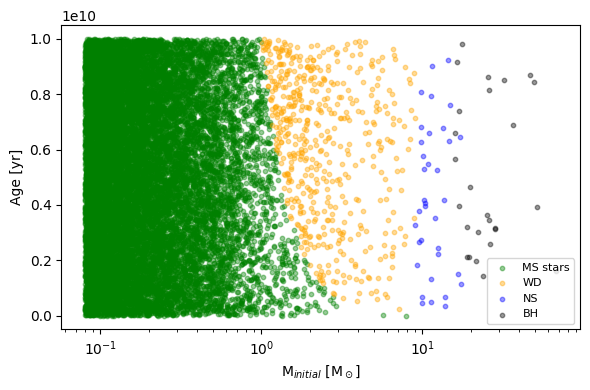

In [70]:
# Plot of star age vs M_init
# logaritmic scale for M_init axe
plt.figure(figsize=(6,4))
plt.scatter(m_init_MS, age_MS, s=10, alpha=0.4, label='MS stars', color='green')
plt.scatter(m_init_WD, age_WD, s=10, alpha=0.4, label='WD', color='orange')
plt.scatter(m_init_NS, age_NS, s=10, alpha=0.4, label='NS', color='blue')
plt.scatter(m_init_BH, age_BH, s=10, alpha=0.4, label='BH', color='black')

plt.xscale('log')
plt.ylabel('Age [yr]')
plt.xlabel('M$_{initial}$ [M$_\\odot$]')
plt.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()